**INTRODUCTION:-** 
This project focuses on building an emotion classification system using a deep learning model. It processes text input to identify emotions such as happiness, sadness, anger, and more. Leveraging pre-trained embeddings, LSTM layers, and a trained tokenizer, the system achieves accurate predictions, making it suitable for sentiment analysis and emotional applications.

**DATASET LOADING AND EDA:-**
The dataset contains text samples labeled with corresponding emotions. It is loaded into a DataFrame for exploration and analysis. Key steps include inspecting the dataset structure, handling missing values, and ensuring data consistency, which form the foundation for preprocessing and effective model training.
Exploratory Data Analysis focuses on understanding the dataset through visualizations and statistical summaries. It identifies text length variations, class imbalances, and trends across emotion categories. Insights from EDA guide preprocessing decisions like truncating, padding, and balancing the dataset for optimal model performance.

In [ ]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/ASUS/Downloads/emotion-dataset.csv"  # Replace with your dataset's file path
df = pd.read_csv(file_path)

# Inspect the first few rows
print(df.head())

# Check for unique emotions and their counts
print(df['Emotion'].value_counts())

   Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64


In [ ]:
target_emotions = ['joy', 'anger', 'sadness', 'fear', 'surprise', 'neutral']
# Filter the dataset for target emotions
df_filtered = df[df['Emotion'].isin(target_emotions)]

# Verify the filtered dataset
print(df_filtered['Emotion'].value_counts())

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
Name: count, dtype: int64


Handling the Class Imbalance
Upsampling the 'neutral' class as it has the lowest count

In [ ]:
from sklearn.utils import resample
# Separate each class into individual DataFrames
joy = df_filtered[df_filtered['Emotion'] == 'joy']
sadness = df_filtered[df_filtered['Emotion'] == 'sadness']
fear = df_filtered[df_filtered['Emotion'] == 'fear']
anger = df_filtered[df_filtered['Emotion'] == 'anger']
surprise = df_filtered[df_filtered['Emotion'] == 'surprise']
neutral = df_filtered[df_filtered['Emotion'] == 'neutral']

# Find the size of the largest class (joy)
max_samples = max(len(joy), len(sadness), len(fear), len(anger), len(surprise))
# Upsample all the minority classes to the size of the largest class
joy_upsampled = resample(joy, replace=True, n_samples=max_samples, random_state=42)
sadness_upsampled = resample(sadness, replace=True, n_samples=max_samples, random_state=42)
fear_upsampled = resample(fear, replace=True, n_samples=max_samples, random_state=42)
anger_upsampled = resample(anger, replace=True, n_samples=max_samples, random_state=42)
surprise_upsampled = resample(surprise, replace=True, n_samples=max_samples, random_state=42)
neutral_upsampled = resample(neutral, replace=True, n_samples=max_samples, random_state=42)
# Check the size of each upsampled class
print("Upsampled class sizes:")
print("Joy:", len(joy_upsampled))
print("Sadness:", len(sadness_upsampled))
print("Fear:", len(fear_upsampled))
print("Anger:", len(anger_upsampled))
print("Surprise:", len(surprise_upsampled))
print("Neutral:", len(neutral_upsampled))

# Combine all upsampled classes into a balanced dataset
df_balanced = pd.concat([joy_upsampled, sadness_upsampled, fear_upsampled, anger_upsampled, surprise_upsampled, neutral_upsampled])
# Shuffle the dataset to ensure randomness
df_balanced = df_balanced.sample(frac=1, random_state=42)
# Verify the new class distribution
print(df_balanced['Emotion'].value_counts())

# Save the balanced dataset to a new file
df_balanced.to_csv("balanced_emotions_dataset.csv", index=False)
print("Balanced dataset saved successfully!")

Upsampled class sizes:
Joy: 11045
Sadness: 11045
Fear: 11045
Anger: 11045
Surprise: 11045
Neutral: 11045
Emotion
neutral     11045
anger       11045
surprise    11045
joy         11045
sadness     11045
fear        11045
Name: count, dtype: int64
Balanced dataset saved successfully!


Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
# Path to the dataset
file_path = "C:/Users/ASUS/Desktop/Week-2_Task/balanced_emotions_dataset.csv"  # Adjust the path accordingly
df = pd.read_csv(file_path)
df.head()

,Emotion,Text
0,neutral,So ?
1,anger,The base is overcrowded. Classes are shutting ...
2,surprise,@br1tn1h0p3 we were. they separated us at birt...
3,neutral,"Hi , Kenji ."
4,anger,Michael Stein was trying unsuccessfully to cal...


In [ ]:
# Check for missing values
print(df.isnull().sum())

Emotion    0
Text       0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8288\924599657.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=df, palette='viridis')


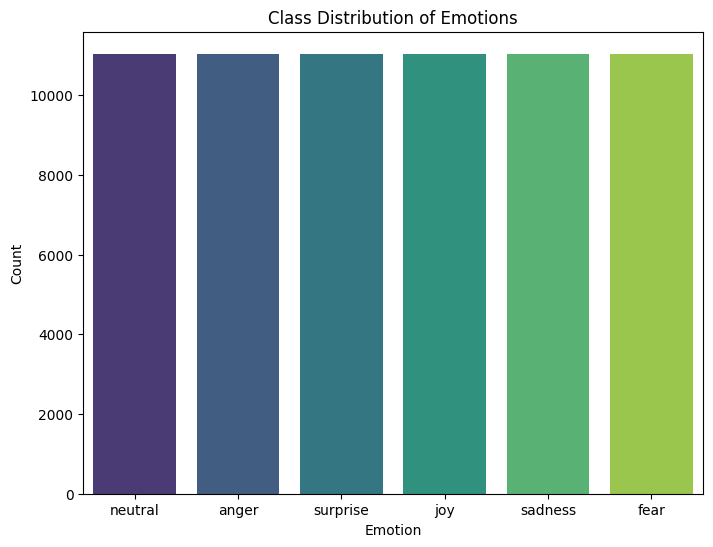

In [ ]:
# Checking Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Emotion', data=df, palette='viridis')
plt.title('Class Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

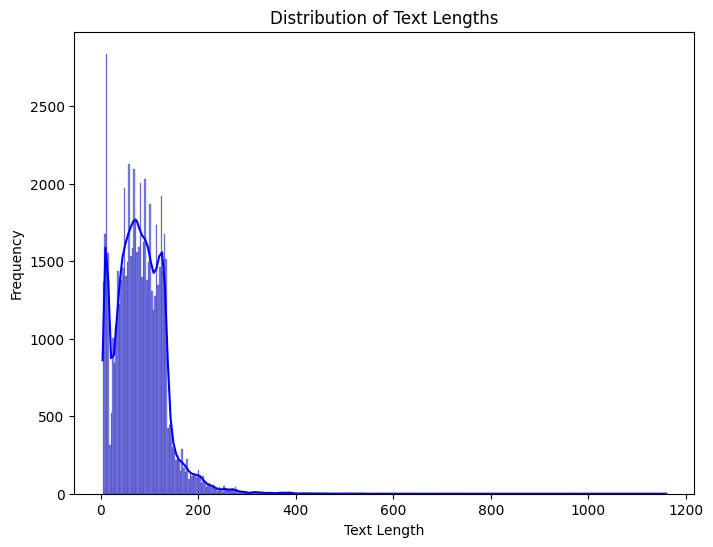

In [ ]:
# Text Length Distribution
# Calculate the length of each text entry
df['text_length'] = df['Text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['text_length'] = df['Text'].apply(len)
print(df[['Text', 'text_length']])

                                                    Text  text_length
0                                                  So ?             6
1      The base is overcrowded. Classes are shutting ...          133
2      @br1tn1h0p3 we were. they separated us at birt...           98
3                                          Hi , Kenji .            13
4      Michael Stein was trying unsuccessfully to cal...           99
...                                                  ...          ...
66265  Lineker became incensed when Taylor went publi...          228
66266                         Thursday night channel 5!            26
66267  iedereen ligt al in bed ofzo en ik zit hier ge...           76
66268  Good Is Faith.  Thank You Jesus.   #belief #pe...           58
66269   But I don't know what else I can do . I am wi...          121

[66270 rows x 2 columns]


In [ ]:
# Basic statistics on the 'text_length' column
text_length_stats = df['text_length'].describe()

# Display the basic statistics
print(text_length_stats)

count    66270.000000
mean        81.852528
std         50.575556
min          4.000000
25%         46.000000
50%         78.000000
75%        113.000000
max       1160.000000
Name: text_length, dtype: float64


**DATASET PREPROCESSING**

Cleaning the text and creating a new column of cleaned text

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a text cleaning function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Keep alphanumeric chars
    words = text.split()  # Tokenize
    return ' '.join(words)

# Apply the cleaning function to the 'Text' column and create a new column 'Cleaned_Text'
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Display the first few rows of the updated DataFrame
print(df[['Text', 'Cleaned_Text']].head())
# Save as a new file instead of overwriting
df.to_csv("dataset_with_cleaned_text1.csv", index=False)
print("Dataset with cleaned text saved as a new file!")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                Text  \
0                                              So ?    
1  The base is overcrowded. Classes are shutting ...   
2  @br1tn1h0p3 we were. they separated us at birt...   
3                                      Hi , Kenji .    
4  Michael Stein was trying unsuccessfully to cal...   

                                        Cleaned_Text  
0                                                 so  
1  the base is overcrowded classes are shutting d...  
2  br1tn1h0p3 we were they separated us at birth ...  
3                                           hi kenji  
4  michael stein was trying unsuccessfully to cal...  
Dataset with cleaned text saved as a new file!


In [ ]:
import pandas as pd
# Path to the dataset
file_path = "C:/Users/ASUS/Desktop/Week-2_Task/dataset_with_cleaned_text1.csv"  # Adjust the path accordingly
df = pd.read_csv(file_path)
df.head()
print(df.isnull().sum())

Emotion            0
Text               0
text_length        0
Cleaned_Text       0
num_characters     0
num_words          0
avg_word_length    0
num_sentences      0
polarity           0
subjectivity       0
dtype: int64


Handling Emojis

In [ ]:
import emoji

# Function to replace emojis with text
def replace_emojis(text):
    return emoji.demojize(text, delimiters=(" ", " "))  # 😊 → :smiling_face_with_smiling_eyes:

# Apply to your text
df['Cleaned_Text'] = df['Cleaned_Text'].apply(replace_emojis)

Handling Abbreviations and Slang

In [ ]:
# Dictionary for common abbreviations and slang
slang_dict = {
    "u": "you",
    "ur": "your",
    "idk": "i don't know",
    "brb": "be right back",
    "lol": "laughing out loud",
    "btw": "by the way"
}

# Function to replace slang terms
def replace_slang(text):
    words = text.split()
    words = [slang_dict[word] if word in slang_dict else word for word in words]
    return ' '.join(words)

# Apply to your text
df['Cleaned_Text'] = df['Cleaned_Text'].apply(replace_slang)

In [ ]:
# Print all column names in the DataFrame
print(df.columns)

Index(['Emotion', 'Text', 'text_length', 'Cleaned_Text', 'num_characters',
       'num_words', 'avg_word_length', 'num_sentences', 'polarity',
       'subjectivity'],
      dtype='object')


In [ ]:
# Save the updated DataFrame back to the same file
df.to_csv("C:/Users/ASUS/Desktop/Week-2_Task/dataset_with_cleaned_text1.csv", index=False)

print("Updated dataset saved successfully!")

Updated dataset saved successfully!


Tranforming our emotion labels into One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Reshape the labels to a 2D array (required for OneHotEncoder)
labels = df['Emotion'].values.reshape(-1, 1)

# Initialize and apply One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(labels)

# Verify the transformation
print("First 5 One-Hot Encoded Labels:")
print(y_encoded[:5])

# Check the shape of the encoded labels
print("Shape of One-Hot Encoded Labels:", y_encoded.shape)

First 5 One-Hot Encoded Labels:
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
Shape of One-Hot Encoded Labels: (66270, 6)


In [ ]:
# Retrieve the label mapping
label_mapping = encoder.categories_[0]
print("Label Mapping:")
for i, label in enumerate(label_mapping):
    print(f"{i}: {label}")

Label Mapping:
0: anger
1: fear
2: joy
3: neutral
4: sadness
5: surprise


In [ ]:
# Check text length distribution
df['text_length'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))
print(df['text_length'].describe())

count    66270.000000
mean        14.708345
std          9.512007
min          1.000000
25%          8.000000
50%         14.000000
75%         20.000000
max        228.000000
Name: text_length, dtype: float64


Padding or truncating is necessary in your case due to the significant variation in text length.
Padding ensures that all sequences have the same length.
Truncating helps ensure that very long texts don't dominate the training process and cause excessive computational overhead.

Steps for Truncating and Padding:
Tokenize the Text Data: First, you need to convert the text data into a numerical format, like tokenizing it into integer sequences (where each word is mapped to an integer). You can use CountVectorizer or TF-IDF Vectorizer for this purpose, but for truncating and padding, tokenization is key.

Apply Truncation and Padding: Use pad_sequences to truncate long texts and pad short texts.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")  # Limit vocabulary size and handle out-of-vocabulary words

# Fit the tokenizer on the cleaned text
tokenizer.fit_on_texts(df['Cleaned_Text'])

# Convert the text into sequences of integers
X_sequences = tokenizer.texts_to_sequences(df['Cleaned_Text'])

# Define the maximum sequence length
max_length = 150  # Adjust this based on your text length distribution

# Apply padding and truncation
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# Verify the padded sequences
print("Shape of padded sequences:", X_padded.shape)
print("First padded sequence:\n", X_padded[0])

Shape of padded sequences: (66270, 150)
First padded sequence:
 [26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


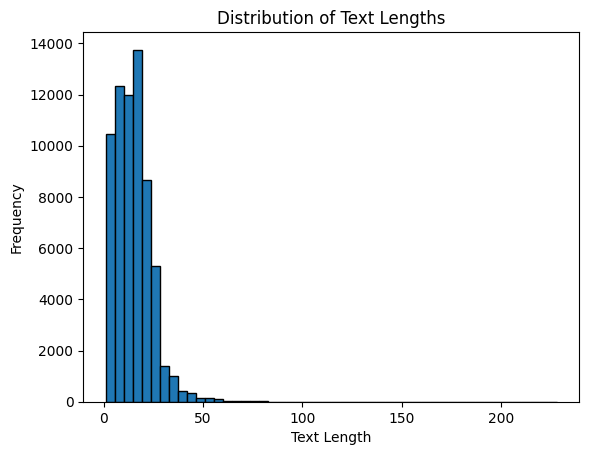

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of text lengths
plt.hist(df['text_length'], bins=50, edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


**DATASET SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (42412, 156) (42412, 6)
Validation data shape: (10604, 156) (10604, 6)
Testing data shape: (13254, 156) (13254, 6)


**FEATURE ENGINEERING**:-

In this, I will be doing Text Length Features and Sentiment Features that are valuable and straightforward features to help our model with emotion classification.

In [ ]:
# Text Length Features
df['num_characters'] = df['Cleaned_Text'].apply(len)  # Number of characters in the text
df['num_words'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))  # Number of words in the text
df['avg_word_length'] = df['num_characters'] / df['num_words']  # Average word length
df['num_sentences'] = df['Cleaned_Text'].apply(lambda x: x.count('.') + x.count('!') + x.count('?'))  # Number of sentences

# Check the first few rows of the new text length features
print(df[['Cleaned_Text', 'num_characters', 'num_words', 'avg_word_length', 'num_sentences']].head())

                                        Cleaned_Text  num_characters  \
0                                                 so               2   
1  the base is overcrowded classes are shutting d...             126   
2  br1tn1h0p3 we were they separated us at birth ...              94   
3                                           hi kenji               8   
4  michael stein was trying unsuccessfully to cal...              96   

   num_words  avg_word_length  num_sentences  
0          1         2.000000              0  
1         22         5.727273              0  
2         19         4.947368              0  
3          2         4.000000              0  
4         16         6.000000              0  


In [ ]:
from textblob import TextBlob

# Create sentiment features
df['polarity'] = df['Cleaned_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)  # Sentiment polarity (-1 to 1)
df['subjectivity'] = df['Cleaned_Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)  # Sentiment subjectivity (0 to 1)

# Check the first few rows of the sentiment features
print(df[['Cleaned_Text', 'polarity', 'subjectivity']].head())

                                        Cleaned_Text  polarity  subjectivity
0                                                 so  0.000000      0.000000
1  the base is overcrowded classes are shutting d... -0.263889      0.672222
2  br1tn1h0p3 we were they separated us at birth ...  0.000000      0.000000
3                                           hi kenji  0.000000      0.000000
4  michael stein was trying unsuccessfully to cal...  0.300000      0.750000


In [ ]:
#Combining both the features
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the numerical features
scaler = StandardScaler()
df[['num_characters', 'num_words', 'avg_word_length', 'num_sentences', 'polarity', 'subjectivity']] = scaler.fit_transform(
    df[['num_characters', 'num_words', 'avg_word_length', 'num_sentences', 'polarity', 'subjectivity']])

# Combine the padded sequences and additional features into a single feature set
X_combined = np.hstack((X_padded, df[['num_characters', 'num_words', 'avg_word_length', 'num_sentences', 'polarity', 'subjectivity']].values))

# Check the shape of the combined features
print("Shape of combined features:", X_combined.shape)

Shape of combined features: (66270, 156)


**MODEL TRAINING**

Building LSTM model

In [ ]:
'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

# Define the LSTM model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=5000, output_dim=100, input_length=X_padded.shape[1]))  # Use the padded sequence length

# LSTM layer
model.add(LSTM(128, return_sequences=False))  # Return a single output after processing the sequence
model.add(Dropout(0.2))  # Dropout for regularization

# Fully connected dense layers
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Batch normalization for stable training
model.add(Dropout(0.2))

# Output layer (for multi-class classification)
model.add(Dense(y_encoded.shape[1], activation='softmax'))  # Number of classes = number of emotions

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()'''

"from tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization\n\n# Define the LSTM model\nmodel = Sequential()\n\n# Embedding layer\nmodel.add(Embedding(input_dim=5000, output_dim=100, input_length=X_padded.shape[1]))  # Use the padded sequence length\n\n# LSTM layer\nmodel.add(LSTM(128, return_sequences=False))  # Return a single output after processing the sequence\nmodel.add(Dropout(0.2))  # Dropout for regularization\n\n# Fully connected dense layers\nmodel.add(Dense(64, activation='relu'))\nmodel.add(BatchNormalization())  # Batch normalization for stable training\nmodel.add(Dropout(0.2))\n\n# Output layer (for multi-class classification)\nmodel.add(Dense(y_encoded.shape[1], activation='softmax'))  # Number of classes = number of emotions\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])\n\n# Print model summary\nmodel.summary()"

Training the model

In [ ]:
'''# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Number of epochs (adjust based on performance)
    batch_size=64,  # Batch size
    validation_data=(X_val, y_val),
    verbose=1  # Show detailed training progress
)'''

'# Train the model\nhistory = model.fit(\n    X_train, y_train,\n    epochs=50,  # Number of epochs (adjust based on performance)\n    batch_size=64,  # Batch size\n    validation_data=(X_val, y_val),\n    verbose=1  # Show detailed training progress\n)'

As our model is not learning well we will use pre trained word embeddings GloVe

In [ ]:
import numpy as np

# Path to the GloVe file (adjust the path based on your download location)
glove_file = "C:/Users/ASUS/Desktop/Week-2_Task/glove.6B.100d.txt"  # Using 100-dimensional embeddings

# Load GloVe embeddings
embedding_index = {}
with open(glove_file, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]  # Word
        coef = np.asarray(values[1:], dtype='float32')  # Vector representation
        embedding_index[word] = coef

print(f"Loaded {len(embedding_index)} word vectors from GloVe.")

Loaded 400001 word vectors from GloVe.


In [ ]:
vocab_size = 5000  # Vocabulary size (same as used in your tokenizer)
embedding_dim = 100  # Embedding dimension (same as GloVe file)

# Initialize embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Populate embedding matrix with GloVe vectors
for word, i in tokenizer.word_index.items():
    if i < vocab_size:  # Limit to vocab_size
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  # Assign GloVe vector
        else:
            embedding_matrix[i] = np.random.uniform(-0.01, 0.01, embedding_dim)  # Random initialization for unknown words

print("Embedding matrix shape:", embedding_matrix.shape)

Embedding matrix shape: (5000, 100)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert y_train to class indices if it's one-hot encoded
if len(y_train.shape) > 1 and y_train.shape[1] > 1:  # Detect one-hot encoding
    y_train_indices = np.argmax(y_train, axis=1)
else:
    y_train_indices = y_train

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_indices),
    y=y_train_indices
)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 0.9886247086247086, 1: 0.9968504677290462, 2: 0.9998114097123998, 3: 0.9877957890814235, 4: 1.0183931229890026, 5: 1.0092328193413287}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

# Define the LSTM model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=5000, output_dim=100, input_length=X_padded.shape[1]))  # Use the padded sequence length

# LSTM layer
model.add(LSTM(128, return_sequences=False))  # Return a single output after processing the sequence
model.add(Dropout(0.2))  # Dropout for regularization

# Fully connected dense layers
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Batch normalization for stable training
model.add(Dropout(0.2))

# Output layer (for multi-class classification)
model.add(Dense(y_encoded.shape[1], activation='softmax'))  # Number of classes = number of emotions

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Set a lower learning rate
optimizer = Adam(learning_rate=0.00005)

# Re-compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Add Early Stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
# Learning rate scheduler
def lr_schedule(epoch, lr):
    if epoch > 10:
        return lr * 0.9  # Reduce learning rate by 10% after epoch 10
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule, verbose=1)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,  # Start with fewer epochs
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping,lr_scheduler],
    class_weight=class_weights,
    verbose=1
)

# Save the model
model.save('emotion_classification_model1.h5')

# Save the tokenizer
import pickle
with open('tokenizer1.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

print("Model and tokenizer saved successfully!")

**MODEL EVALUATIONS**

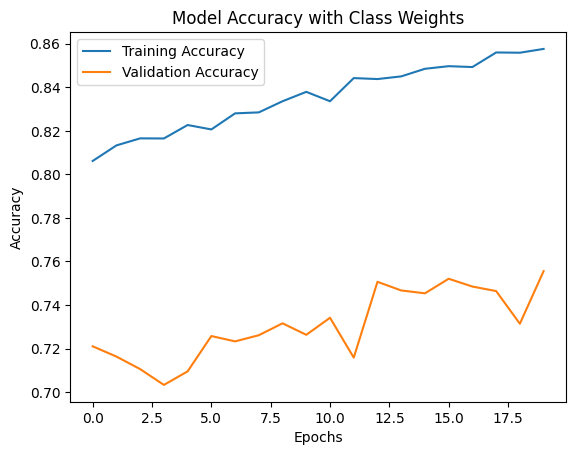

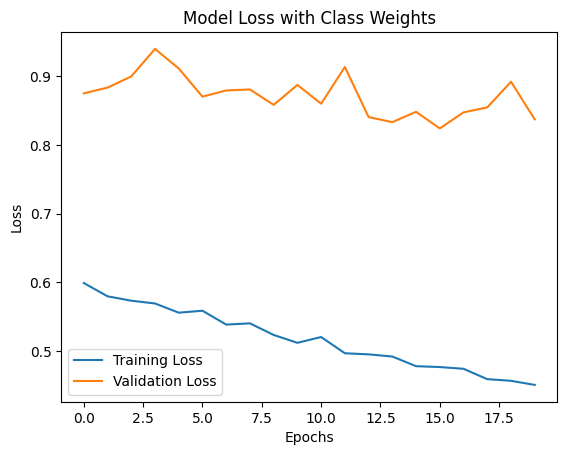

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Class Weights')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Class Weights')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**VISUALIZATION RESULTS**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("C:/Users/ASUS/Desktop/Week-2_Task/emotion_classification_model.h5")
model.summary()

415/415 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.7621 - loss: 0.7744
Test Loss: 0.7914263010025024
Test Accuracy: 0.759544312953949
415/415 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step
Classification Report:
              precision    recall  f1-score   support

       anger       0.78      0.76      0.77      2176
        fear       0.82      0.78      0.80      2192
         joy       0.61      0.69      0.65      2189
     neutral       0.93      0.96      0.95      2178
     sadness       0.65      0.61      0.63      2291
    surprise       0.78      0.77      0.77      2228

    accuracy                           0.76     13254
   macro avg       0.76      0.76      0.76     13254
weighted avg       0.76      0.76      0.76     13254



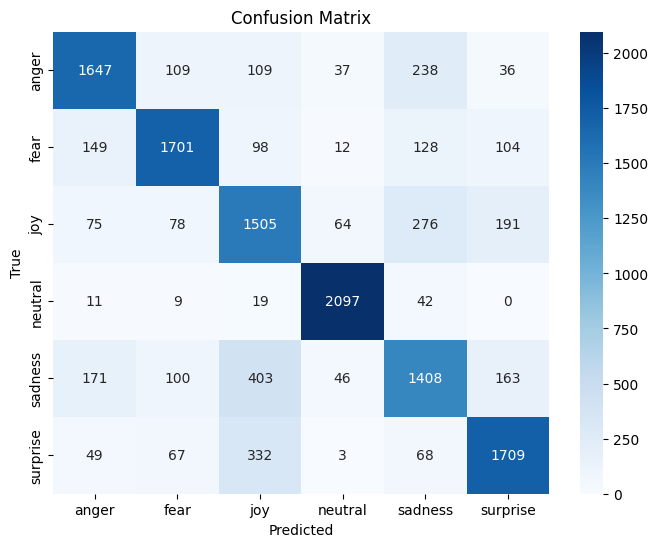

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('C:/Users/ASUS/Desktop/Week-2_Task/emotion_classification_model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
import pickle

# Load the tokenizer
with open("C:/Users/ASUS/Desktop/Week-2_Task/tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example input
custom_text = ["I am not going to school!"]

# Convert text to sequences
tokenized_text = tokenizer.texts_to_sequences(custom_text)

# Pad sequences to match the model's expected input length (156 in your case)
padded_text = pad_sequences(tokenized_text, maxlen=156, padding="post", truncating="post")

print("Padded Text:", padded_text)

Padded Text: [[  2  94  19  77   4 112   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]]


In [ ]:
import numpy as np

# Predict the emotion class
predictions = model.predict(padded_text)
predicted_class = np.argmax(predictions, axis=1)

# Map predicted class index to class names
class_names = ['anger', 'fear', 'joy', 'neutral', 'sadness', 'surprise']  # Replace with your actual class names
predicted_emotion = class_names[predicted_class[0]]

print(f"Custom Input: {custom_text[0]}")
print(f"Predicted Emotion: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Custom Input: I am not going to school!
Predicted Emotion: neutral
